<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/ARTICULO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FRECUENTISTAS VS BAYESIANOS**

Hay dos enfoques diferentes dentro de la estadística: frecuentista y bayesiana. La definicion de cada una de ellas es la siguiente:

*   **Frecuentista:** para los frecuentistas la probabilidad solo tiene sentido en un caso donde exsite un límite de mediciones repetidas. las probabilidades están fundamentalmente relacionadas con las frecuencias de los eventos.

*   **Bayesiana:** para los bayesianos, el concepto de probabilidad se extiende en cubrir grados de certeza sobre afrimaciones.

La probabilidad utilizada por los bayesianos puede estimarse a partir de frecuencias en el limite de un gran número de experimentos repetidos, pero no es la parte fundamental.

Esta probabilidad se basa en el conocimiento de los valores basados en información previa y en los datos disponibles.





**MEDICIONES DE FLUJO DE FOTONES**

Imagina que apuntamos un telescopio al cielo y observamos la luz que proviene de una sola estrella.

En este ejemplo se supone que:



1. El flujo de fototnes tiene un valor fijo F.
2. Se ignoran efectos como el fondo del cielo y errores sistemáticos.
3. Aumimos que se realiza una serie de *N* mediciones, donde la *i-ésima* medición reporta el flujo observado $F_i$ y ek error $e_i$

Para este ejemplo, la pregunta es, dado este conjunto de mediciones $D={F_i,e_i} $, ¿cuál es nuestra mejor estimación del flujo verdadero F?

**PROGRAMA EN PYTHON**

En el siguiente programa se generan datos simulados para demostrar los dos enfoques del problema.

Se toman 50 muestras, con una media de 1000.

In [8]:
import numpy as np

In [9]:
np.random.seed(2)
e = np.random.normal(30,3,50) #Genera números alatorios con media 30 y desviación estándar 2, los cuales corresponden a los errores.
F = np.random.normal(1000,e) #Fi con media 100 y errores ei

In [10]:
e

array([28.74972646, 29.83119952, 23.59141171, 34.92081243, 24.61969324,
       27.4747579 , 31.50864425, 26.26413574, 26.82614334, 27.27297716,
       31.65436213, 36.87662404, 30.12461818, 26.64622366, 31.61717496,
       28.2115209 , 29.94260851, 33.52500366, 27.75638715, 30.02707575,
       27.36567632, 29.53069749, 30.76971136, 27.03366285, 28.9835341 ,
       29.29144791, 28.08703496, 26.43716314, 25.73634832, 29.53951441,
       29.19282912, 36.69410037, 22.69569727, 30.33817951, 31.11133361,
       34.07890159, 31.50557162, 27.46735889, 30.00002928, 31.62705772,
       29.05947541, 32.31303521, 24.39572804, 35.193554  , 34.40303403,
       28.99296798, 31.83402234, 30.14391178, 27.51259413, 30.26313066])

In [11]:
F

array([1028.7602456 ,  988.63155308,  991.13742797,  997.39942046,
       1010.67254667, 1035.12315986,  980.00211556, 1013.35258793,
       1005.79755896,  949.31010685,  986.72680423,  995.12015696,
        998.80796164, 1008.6867604 ,  935.49074919, 1001.30493866,
        979.70862549,  951.74280136, 1014.55257469, 1022.07829553,
        982.12336462, 1024.8783216 ,  988.26084798, 1001.79744146,
        968.15466226, 1046.41192007,  925.30395014,  997.58225209,
       1017.88984028,  939.93238565,  994.46885613,  997.16653054,
       1018.71720975, 1037.86850766,  987.43437287,  952.81712462,
       1043.07553357, 1033.45210177,  986.13982603, 1011.09757065,
       1011.09683244, 1018.29807828, 1004.98180232, 1049.50664014,
        940.20892002, 1030.17657556, 1012.1119532 ,  993.45469362,
       1032.28689582,  929.07523043])

¿cuál es nuestra mejor estimación puntual del flujo verdadero?, para ello se realiza el enfoque frecuentista y bayesiano.

**ENFOQUE FRECUENTISTA**

Se define una observación individual como $D_i = (F_i,e_i)$

-Se supone que el verdadero flujo $F$ sigue errores gaussianos.

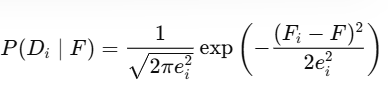

La ecuación anterior corresponde a una distribución normal con media $F$ y desviación estándar $e_i$

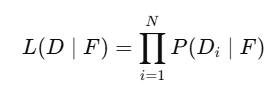

En esta ecuación $D = {D_i}$ representa el conjunto de mediciones. Sin embargo, por simplicidad analítica y precisión numérica, se considera el logaritmo de la verosimilitud:

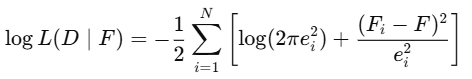

Se busca determinar el valor de F que maximiza la verosimilitud. La cual se puede calcular analitiamente aplicando derivada por ambos lados e igualando a cero.

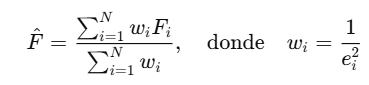

La cual corresponde a una media ponderada de los valores observados.

Para el caso en el que los errores $e_i$ sean iguales, los pesos se cancelan y $\hat{F}$ es simplemente la media de los datos observados.

**ESTIMACION DE LA INCERTIDUMBRE**
Para la inceridumbre de la estimación se contruye una aproximación gaussiana en torno al máximo de la verosimilitud. Donde se obtiene el siguiente resultado


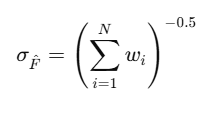

In [12]:
#Evaluación de la ecuación anterior
w = 1. / e**2
F_hat = np.sum(w * F) / np.sum(w)
sigma_F = np.sum(w)**-0.5

print(f"Estimación de F: {F_hat:.2f} ± {sigma_F:.2f}")


Estimación de F: 998.65 ± 4.11


**ENFOQUE BAYESIANO PARA LA MEDICIÓN DE FLUJO**
Su caracteristica principal es que empieza y termina con porbabilidades.

Se calcula la probabilidad $P(F|D)$ por medio del teorema de Bayes.

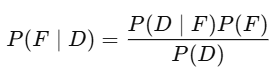

Esta formulación es contraria a la filosofía frecuentista, que sostiene que las probabilidades no tienen significado para párametros de modelos fijos como $\hat{F}$

**DESGLOSE DE LOS TÉRMINOS EN AL FÓRMULA DE BAYES**

* $P(F∣D):$ El posterior, que es la probabilidad de los parámetros del modelo dados los datos.
* $P(D∣F):$ La verosimilitud, que es proporcional a $L(D∣F)$ usada en el enfoque frecuentista.
* $P(F):$ El prior del modelo, que codifica lo que sabíamos sobre el modelo antes de considerar los datos
* $P(D):$ La evidencia del modelo, que en la práctica es un término de normalización.

el posterior bayesiano se maximiza en el mismo valor que el resultado frecuentista, ya que si se establece el priori $P(F) = 1$ se tiene que
$$
P(F|D) \  \alpha \ P(D|F)
$$

**PAPEL DEL PRIOR**

 El prior permite la inclusión de información previa en el cálculo, lo cual es especialmente útil en casos donde se combinan múltiples estrategias de medición para restringir un único modelo

 * Los frecuentistas argumentan que la elección subjetiva de un prior, que necesariamente sesga el resultado, no debería tener lugar en el análisis de datos científicos.
 * Un bayesiano diría que es mejor hacer esta elección implícita explícita, aunque incluya cierta subjetividad.


**DIVERGENCIA**
Sus principales diferencias son las siguientes:
1. El tratamiento de los parámetros molestos: cualquier cantidad cuyo valor no es directamente relevante para el objetivo del análisis, pero que es necesaria para determinar el resultado de interés.

2. El manejo diferente de la incertidumbre


En el enfoque bayesiano, en lugar de asumir un valor fijo para p, integramos sobre todas las posibles distribuciones de p considerando el posterior basado en la observación D y un prior adecuado.

**CALCULO**

La probabilidad marginal se puede caclular integradno sobre la distribución conjunta $P(V,p|D)$

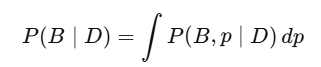

**JUEGO DE BILLAR**

Un grupo de personas juegan en una mesa de billar, hay pone en un marca en un sitio que los 2 jugadores descononcen, el juego consiste en que al tirar una bola (con la misma probabilidad de caer en cualquier lado de la mesa), si la bola cae del lado derecho de la marca, el primer jugador obtiene un punto, si cae del lado izquierdo, el segundo jugador obtiene un punto.

Después de 8 tiros, el jugador 1 tiene 5 puntos y el jugador 2 tiene 3 puntos.

¿Cuál es la probabilidad de que el jugador 2 obtenga 6 puntos y gane?

**ENFOQUE FRECUENTISTA**

Se utiliza l amáxima verosimilitud:

$$\hat{p}=5/8$$

La probabilidad de que el jugador obtenga 3 puntos seguidos y gane esta dada por $$P(B)=(1-\hat{p})^3=0.053$$

**ENFOQUE BAYESIANO**

Se utiliza la marginalidad sobre la probabilidad de que la bola caiga del lado del derecho de la marca para integrar la incertidumbre sobre donde está la marca:

$$P(B|D)= \frac{\int_0^1(1-p)^6p^5dp}{\int_0^1(1-p)^3p^5dp}$$

En python esta probabilidad se puede calcular de manera sencilla

In [13]:
from scipy.special import beta

P_B_D = beta(6 + 1, 5 + 1) / beta(3 + 1, 5 + 1)
print(P_B_D)  # Esto devuelve P(B | D)

0.09090909090909091


Esto significa que las probabilidades son de aproximadamente 10 a 1 en contra de que Bob gane.

**Reflexiones sobre la Frecuentismo**

La conclusión no es que el frecuentismo sea incorrecto. Más bien, el enfoque frecuentista se queda corto porque no considera cómo p puede variar. Existen métodos frecuentistas más robustos que abordan la variabilidad de
p, tales como:

* Aplicar una transformación y condicionar los datos para aislar la dependencia de p.

* Realizar una integral similar a la bayesiana sobre la distribución de muestreo del estimador frecuentista $\hat{p}$

**Confianza vs. Credibilidad**

Otra consecuencia importante de la diferencia filosófica entre frecuentismo y bayesianismo se ve en el tratamiento de la incertidumbre.

* Intervalos de confianza (ICs): Frecuentistas
* Regiones creíbles (CRs): Bayesiana

**La Diferencia Subtil entre Enfoques Bayesianos y Frecuentistas**
* Bayesiano: Hace una afirmación sobre la probabilidad del valor de un parámetro dado una región creíble fija.
* Frecuentista: Hace una afirmación sobre la probabilidad del intervalo de confianza (IC) dado un valor de parámetro fijo.

**APLICACIÓN: UN MODELO LINEAL SIMPLE**
Modelo lineal simple de tres parámetros que ajusta una recta a datos con errores desconocidos.

**Modelo y Likelihood**
El modelo de los datos $D = {(x_i,y_i)}$ se define como:
$$
\hat{y} = \alpha + \beta x_i
$$

La función de verosimilitud es el producto de las distribuciones gaussianas para cada punto:



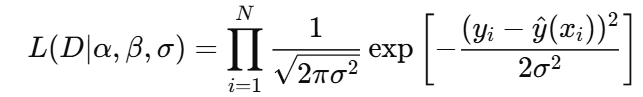

Generación de datos

In [8]:
import numpy as np

np.random.seed(42)  # Para la repetibilidad
theta_true = (25, 0.5)
xdata = 100 * np.random.random(20)
ydata = theta_true[0] + theta_true[1] * xdata
ydata = np.random.normal(ydata, 10)  # Agregar error

SOLUCIÓN FRECUENTISTA

In [15]:
import statsmodels.api as sm

# Agregar una columna de unos para la intersección
X = sm.add_constant(xdata)
model = sm.OLS(ydata, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     41.97
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           4.30e-06
Time:                        04:39:32   Log-Likelihood:                -71.887
No. Observations:                  20   AIC:                             147.8
Df Residuals:                      18   BIC:                             149.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6361      3.787      6.505      0.0

Ajusta el modelo lineal a los datos y proporciona un resumen que incluye estimaciones de los parámetros, errores estándar, valores
p, y otros estadísticos relevantes.

**Comparación con Enfoques Bayesianos**
Implementaciones de MCMC

Se describen las implementaciones bayesianas utilizando emcee, PyMC y PyStan

In [19]:
!pip install emcee==2.2.1

  Preparing metadata (setup.py) ... done
  Created wheel for emcee: filename=emcee-2.2.1-py3-none-any.whl size=29598 sha256=2da57a8ff28ecb6e2bed0f946e000e581bec65d8ad59b350d3ddb42c35ebe754
  Stored in directory: /root/.cache/pip/wheels/ce/4b/06/44c176a4c0d2f2e1675b003dd585d76f110e7338579161784a
Successfully built emcee


In [20]:
import emcee #version2.0
def log_prior(theta):
 alpha,beta,sigma=theta
 if sigma<0:
  return-np.inf #log(0)
 else:
  return(-1.5 * np.log(1+beta**2)-np.log(sigma))
def log_like(theta,x,y):
 alpha,beta,sigma=theta
 y_model=alpha+beta * x
 return-0.5 * np.sum(np.log(2*np.pi*sigma**2)+
 (y-y_model)**2/ sigma**2)

def log_posterior(theta,x,y):
 return log_prior(theta)+log_like(theta,x,y)

In [21]:
 ndim = 3 # number of parameters in the model
 nwalkers = 50 # number of MCMC walkers
 nburn = 1000 # "burn-in" to stabilize chains
 nsteps = 2000 # number of MCMC steps to take
 starting_guesses = np.random.rand(nwalkers, ndim)

In [22]:
sampler = emcee.EnsembleSampler(nwalkers, ndim,log_posterior,args=[xdata,ydata])
sampler.run_mcmc(starting_guesses, nsteps)
# chain is of shape (nwalkers, nsteps, ndim):
# discard burn-in points and reshape:
trace = sampler.chain[:, nburn:, :]
trace = trace.reshape(-1, ndim).T

In [27]:
!pip install corner

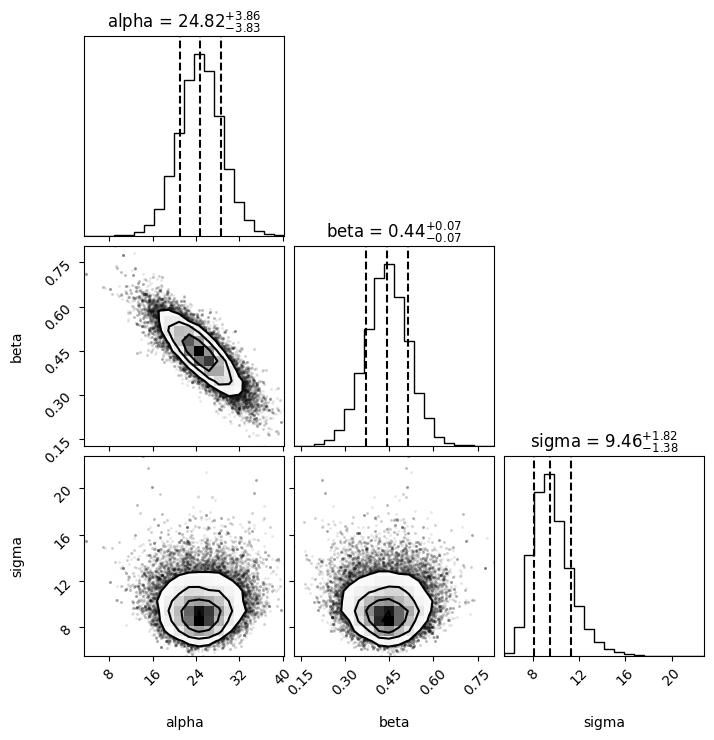

In [29]:
import matplotlib.pyplot as plt
import corner

fig = corner.corner(trace.T, labels=["alpha", "beta", "sigma"], quantiles=[0.16, 0.5, 0.84], show_titles=True);
plt.show()


La librería **corner** es una herramienta útil en Python, especialmente en el análisis de datos, para crear gráficos de "corner plots" o diagramas de esquinas. Este tipo de gráfico muestra las **distribuciones univariadas de los parámetros** y sus correlaciones bidimensionales, lo cual es útil cuando se trabaja con modelos de ajuste de datos que implican múltiples parámetros, como en el **análisis bayesiano.**

Instalamos la libreria PyMC3

In [3]:
!pip install pymc3

In [4]:
import pymc3 as pm

basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=-100, sigma=100)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * xdata

    # Likelihood (sampling distribution) of observations
    y = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=ydata)

    y_model = pm.Deterministic("y_model", mu) # Define y_model using pm.Deterministic

    model = dict(alpha=alpha, beta=beta, sigma=sigma,y_model=y_model, y=y)

    trace = pm.sample(10000, tune=5000, chains=4, cores=4) # Adjust chains and cores as needed


RuntimeError: 
Could not import 'mkl'.  If you are using conda, update the numpy
packages to the latest build otherwise, set MKL_THREADING_LAYER=GNU in
your environment for MKL 2018.

If you have MKL 2017 install and are not in a conda environment you
can set the Theano flag blas.check_openmp to False.  Be warned that if
you set this flag and don't set the appropriate environment or make
sure you have the right version you *will* get wrong results.


Se presenta un error el cual es complicado de solucionar, por lo que en esta ocasión lo pasaremos por alto.

In [6]:
!pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.3 MB/s eta 0:00:00


In [12]:
import stan
import asyncio

model_code = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
"""

# Instead of creating a new event loop, get the existing one.
# If one doesn't exist, this will create one and set it as current.
loop = asyncio.get_event_loop()

async def build_and_sample():
    model = await stan.build(model_code, data={"N": len(ydata), "x": xdata, "y": ydata})
    fit = await model.sample(num_samples=2000)
    return fit

# Run the coroutine within the existing event loop.
fit = loop.run_until_complete(build_and_sample())

RuntimeError: This event loop is already running

Al igual que el anterior, se tienen porblemas en las librerias, para este caso se dice se estan corriendo dos eventos a la vez, por lo que no es posoble ejecutar.